In [15]:
import matplotlib as plt 
import numpy as np 
import pandas as pd

import seaborn as sns
import math
import random
import pylab
%matplotlib inline

In [16]:
d=100
M=1000

In [3]:
k = [1/(1+(m/(d/2))**2) for m in range(-10*d,10*d+1)]
x = [i for i in range(-10*d,10*d+1)]

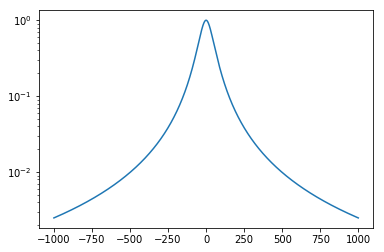

In [4]:
pylab.semilogy(x,k)

In [5]:
alpha = np.random.normal(0,1,4000)
out = []
b=np.empty(len(k))
for i in range(0,2000):
    b=k*alpha[i:i+len(k)]
    out.append(sum(b))
res = np.cumsum(np.array(out))

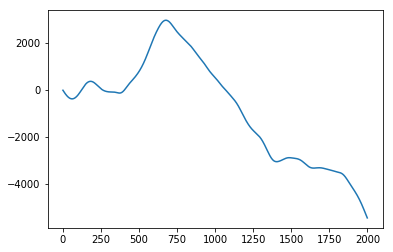

In [6]:
pylab.plot(res)

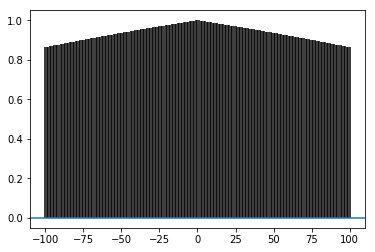

In [7]:
g=plt.pyplot.xcorr(res-np.mean(res),res-np.mean(res),maxlags=100,normed = True)

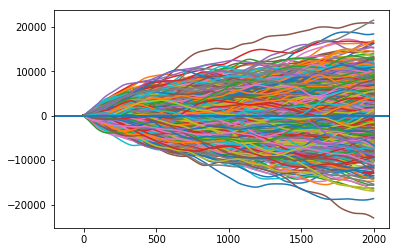

In [26]:
#tracks = []
time_wins = []
fcorr=np.zeros(201)
k = [1/(1+(m/(d/2))**2) for m in range(-10*d,10*d+1)]
k=np.array(k)
for n in range(0,M):
    alpha = np.random.normal(0,1,4000)
    out = []
    b=np.empty(len(k))
    for i in range(0,2000):
        b=k*alpha[i:i+len(k)]
        out.append(sum(b))
    res = np.cumsum(np.array(out))
    count=0
    count = len(np.nonzero(res>0)[0])
  #  tracks.append(res)
    time_wins.append(count/len(res))
    pylab.plot(res)
    g=plt.pyplot.xcorr(res-np.mean(res),res-np.mean(res),maxlags=100,normed = True)
    fcorr=fcorr+np.array(g[1])
pylab.show()

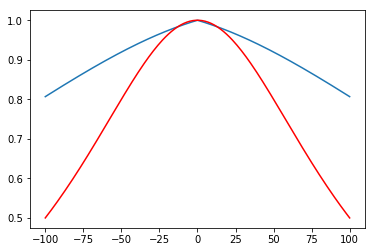

In [28]:
taskcorr=[1/(1+(m/d)**2) for m in range(-100,100+1)]
pylab.plot(g[0],fcorr/1000)
pylab.plot(g[0],taskcorr,'red')

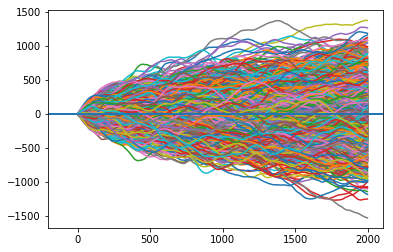

In [27]:
time_wins2 = []
fcorr2=np.zeros(201)
k2 = [0 for m in range(-10*d,10*d+1)]
for q in range(1000,1101):
    k2.insert(q,1/(d**(1/2)))
    del k2[q+1]
k2=np.array(k2)
for n in range(0,M):
    alpha = np.random.normal(0,1,4000)
    out2 = []
    b=np.empty(len(k2))
    for i in range(0,2000):
        b=k2*alpha[i:i+len(k2)]
        out2.append(sum(b))
    res2 = np.cumsum(np.array(out2))
    count2=0
    count2 = len(np.nonzero(res2>0)[0])
  #  tracks.append(res)
    time_wins2.append(count2/len(res2))
    pylab.plot(res2)
    g2=plt.pyplot.xcorr(res2-np.mean(res2),res2-np.mean(res2),maxlags=100,normed = True)
    fcorr2=fcorr2+np.array(g2[1])
pylab.show()

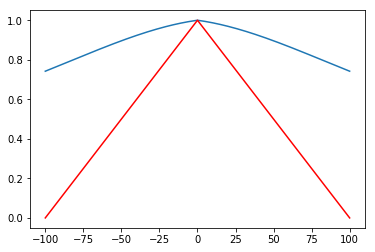

In [29]:
taskcorr2=[1-math.fabs(m/d) for m in range(-100,100+1)]
pylab.plot(g2[0],fcorr2/1000)
pylab.plot(g2[0],taskcorr2,'red')

(array([222.,  78.,  59.,  72.,  54.,  57.,  65.,  67.,  81., 245.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

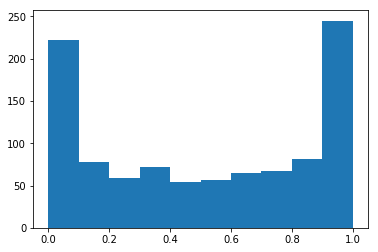

In [30]:
pylab.hist(time_wins)

(array([203.,  92.,  83.,  71.,  66.,  70.,  65.,  77.,  60., 213.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

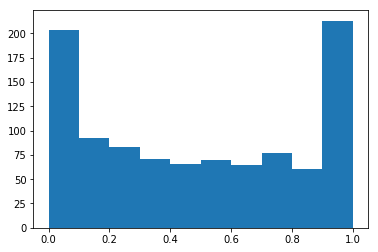

In [31]:
pylab.hist(time_wins2)

In [32]:
from scipy.stats import ks_2samp

ks_2samp(time_wins,time_wins2)

Ks_2sampResult(statistic=0.06700000000000006, pvalue=0.02136181488110996)

In [33]:
c_ = 0
for i in range(0,1000):
    if time_wins[i] < 0.05:
        c_+=1
c_/1000

0.181

In [34]:
c__ = 0
for i in range(0,1000):
    if time_wins2[i] < 0.05:
        c__+=1
c__/1000

0.152